# Health Care Prediction on Diabetic Patients - Case Study



### Loading the required Library Packages

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading and exploring the Health Care Dataset

In [186]:
data=pd.read_csv('health care diabetes.csv')
#List first 5 rec
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [187]:
# Number of (rows and columns), elements, dimensions
data.shape, data.size, data.ndim

((768, 9), 6912, 2)

In [188]:
# Information of the data set like , data type , memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [189]:
# Summary of stastical information of the data set
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [190]:
#checking the null values of the data set
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [191]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

<Figure size 1200x800 with 0 Axes>

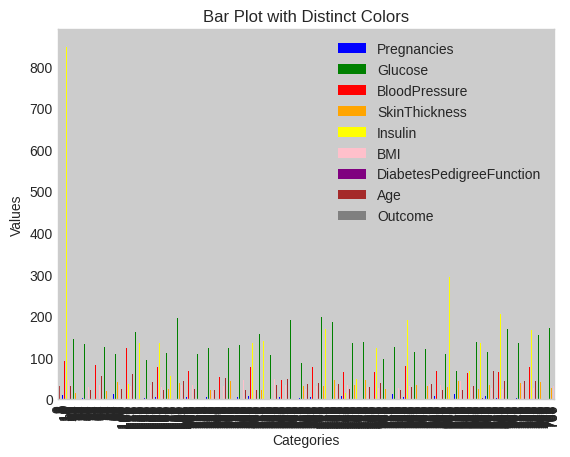

In [192]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(data))
data.plot(kind='bar', color = ['blue', 'green','red','orange','yellow','pink','purple','brown','grey'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot with Distinct Colors')
plt.show()

###  Data Preprocessing: Treating the Missing Values

In [193]:
#Identifying the mean of the various features

print("Mean Value of Glucose Level is \t:",round(data['Glucose'].mean(),3))
print("Mean Value of Blood Pressure is :",round(data['BloodPressure'].mean(),3))
print("Mean Value of Skin Thickness is :",round(data['SkinThickness'].mean(),3))
print("Mean Value of insulin Level is \t:",round(data['Insulin'].mean(),3))

Mean Value of Glucose Level is 	: 120.895
Mean Value of Blood Pressure is : 69.105
Mean Value of Skin Thickness is : 20.536
Mean Value of insulin Level is 	: 79.799


In [194]:
# Finding the number of rows which has 0 in various features indicating NULL values

print("NULL Values proportion in dataset for different Variables : \n")
print('Glucose\t\t-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure\t-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness\t-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin\t\t-',len(data['Insulin'][data['Insulin']==0]))

NULL Values proportion in dataset for different Variables : 

Glucose		- 5
BloodPressure	- 35
SkinThickness	- 227
Insulin		- 374


In [195]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [196]:
# Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [197]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [198]:
columns=data[selected_columns]

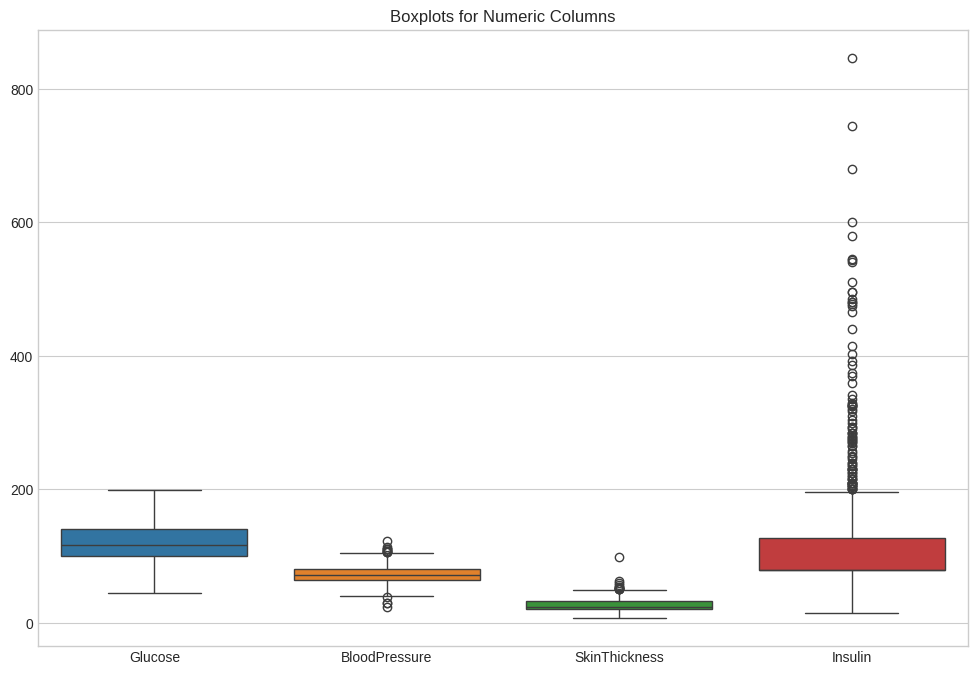

In [199]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [200]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [201]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


## Outlier Treatment

In [202]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [203]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(678, 9)
(768, 9)


In [204]:
data_cleared_iqr

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[678 rows x 9 columns]

In [205]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

## Chart

#### Box chart

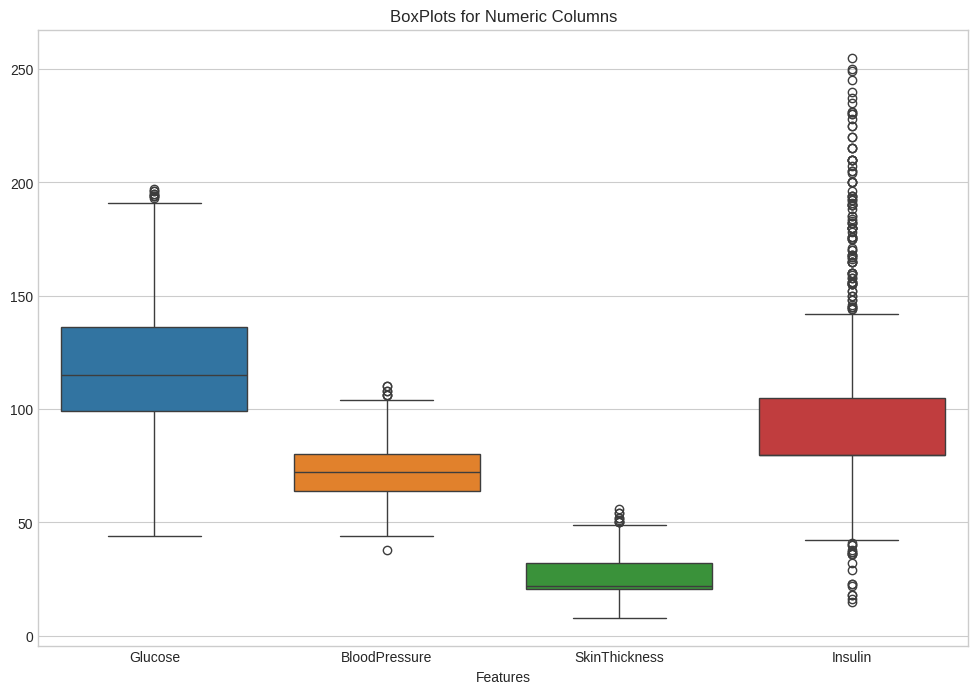

In [206]:
# Checking the outliers after treatment using box plot
plt.figure(figsize=(12, 8))
ax=sns.boxplot(data=col)
ax.set(title='BoxPlots for Numeric Columns',xlabel='Features')
plt.show()

#### Line chart

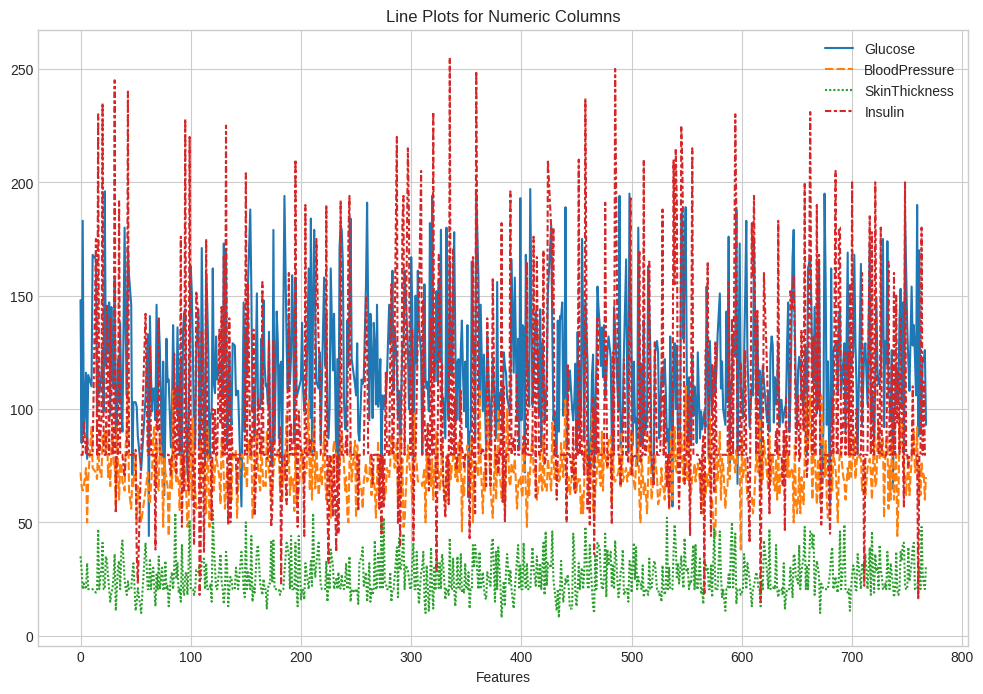

In [207]:
plt.figure(figsize=(12, 8))
ax=sns.lineplot(data=col)
ax.set(title='Line Plots for Numeric Columns',xlabel='Features')
plt.show()

#### Bar chart

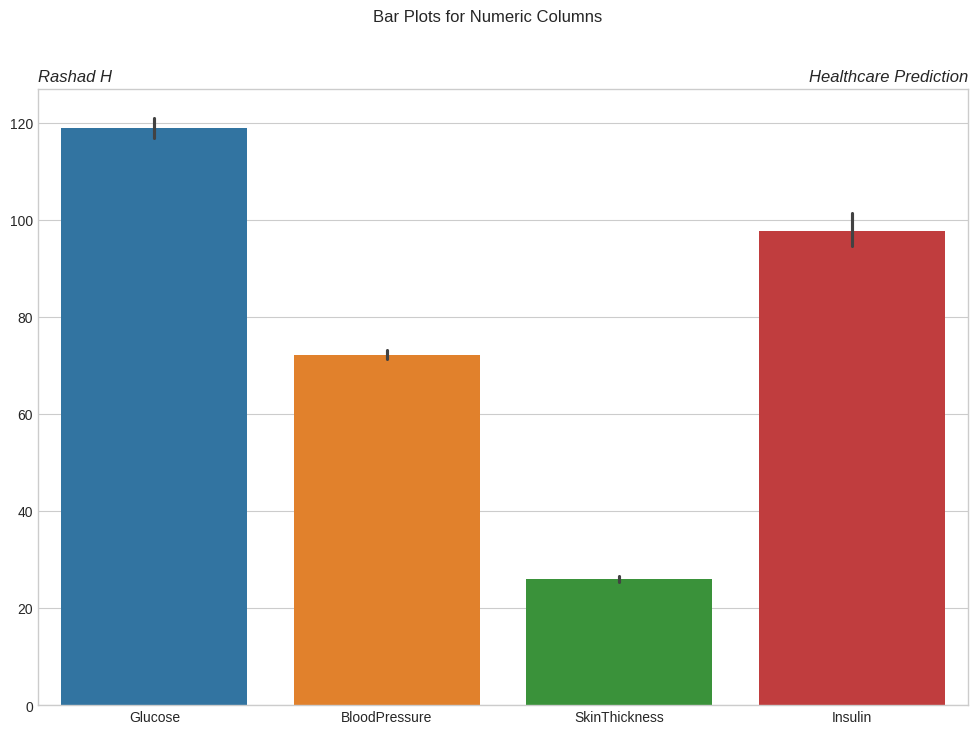

In [208]:
plt.figure(figsize=(12, 8))
sns.barplot(data=col)
plt.suptitle('Bar Plots for Numeric Columns')
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

### Violin Chart

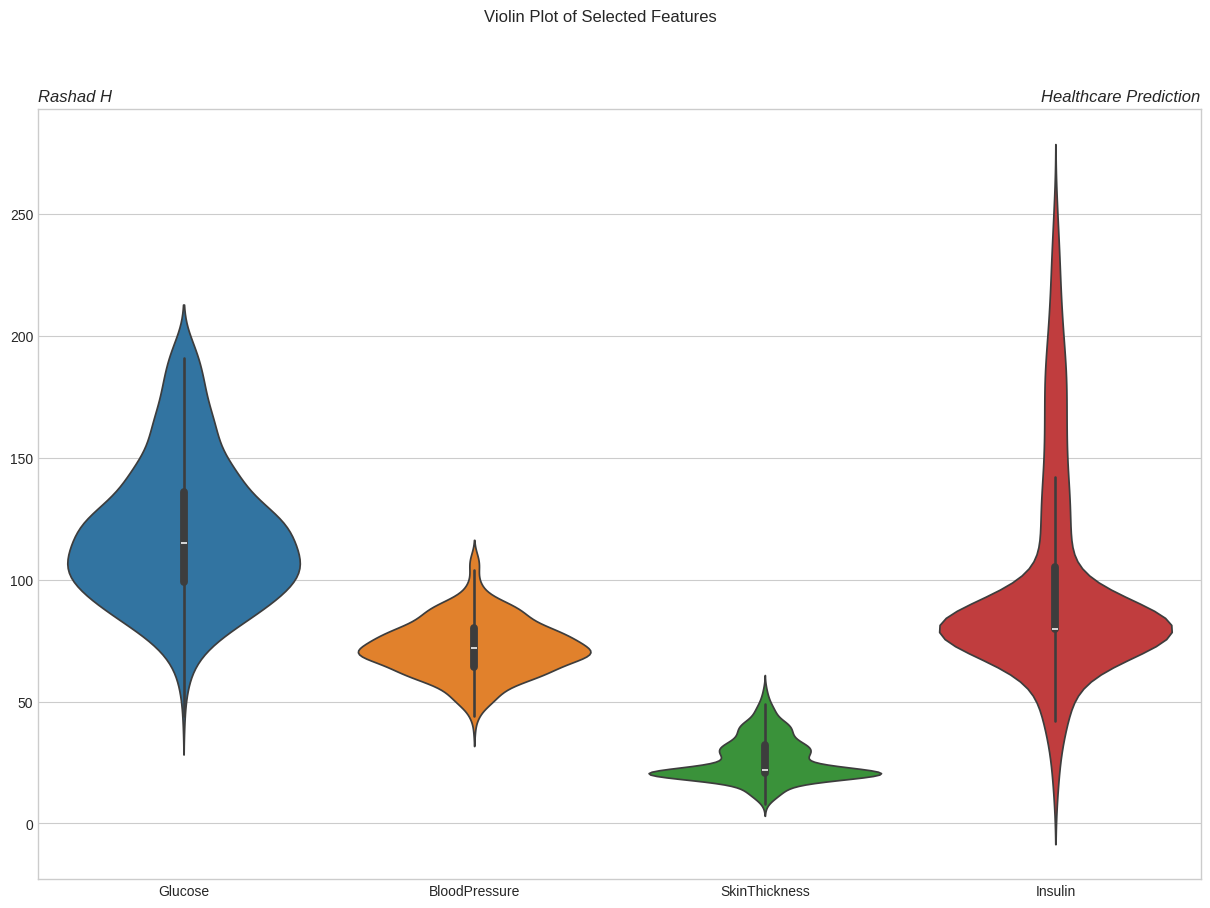

In [209]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=col)
plt.suptitle("Violin Plot of Selected Features")
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

### Heat Map Chart

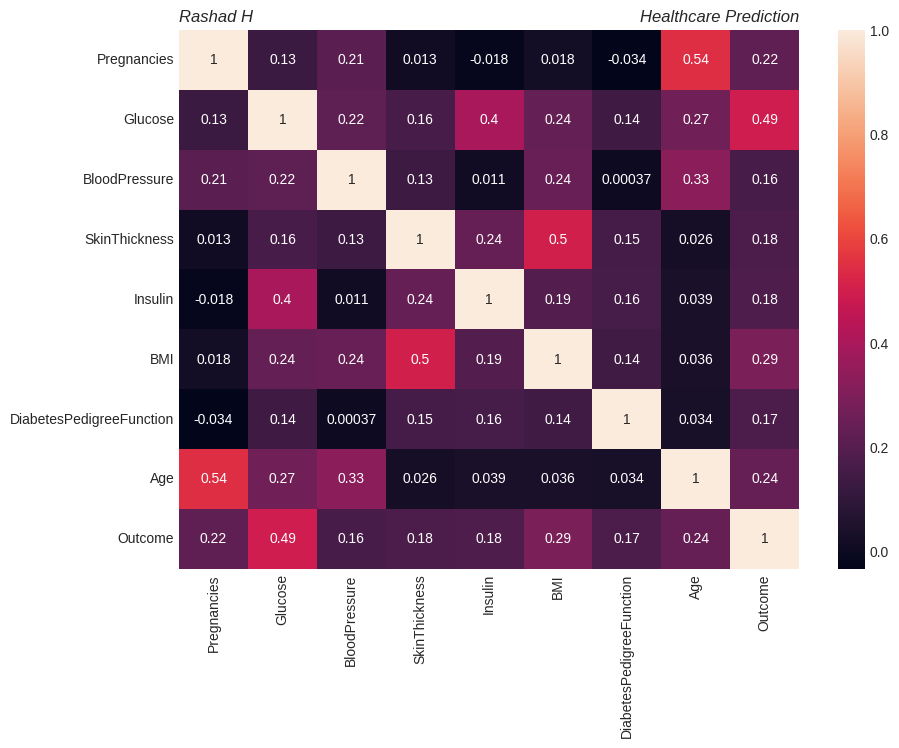

In [210]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

### Pair Chart

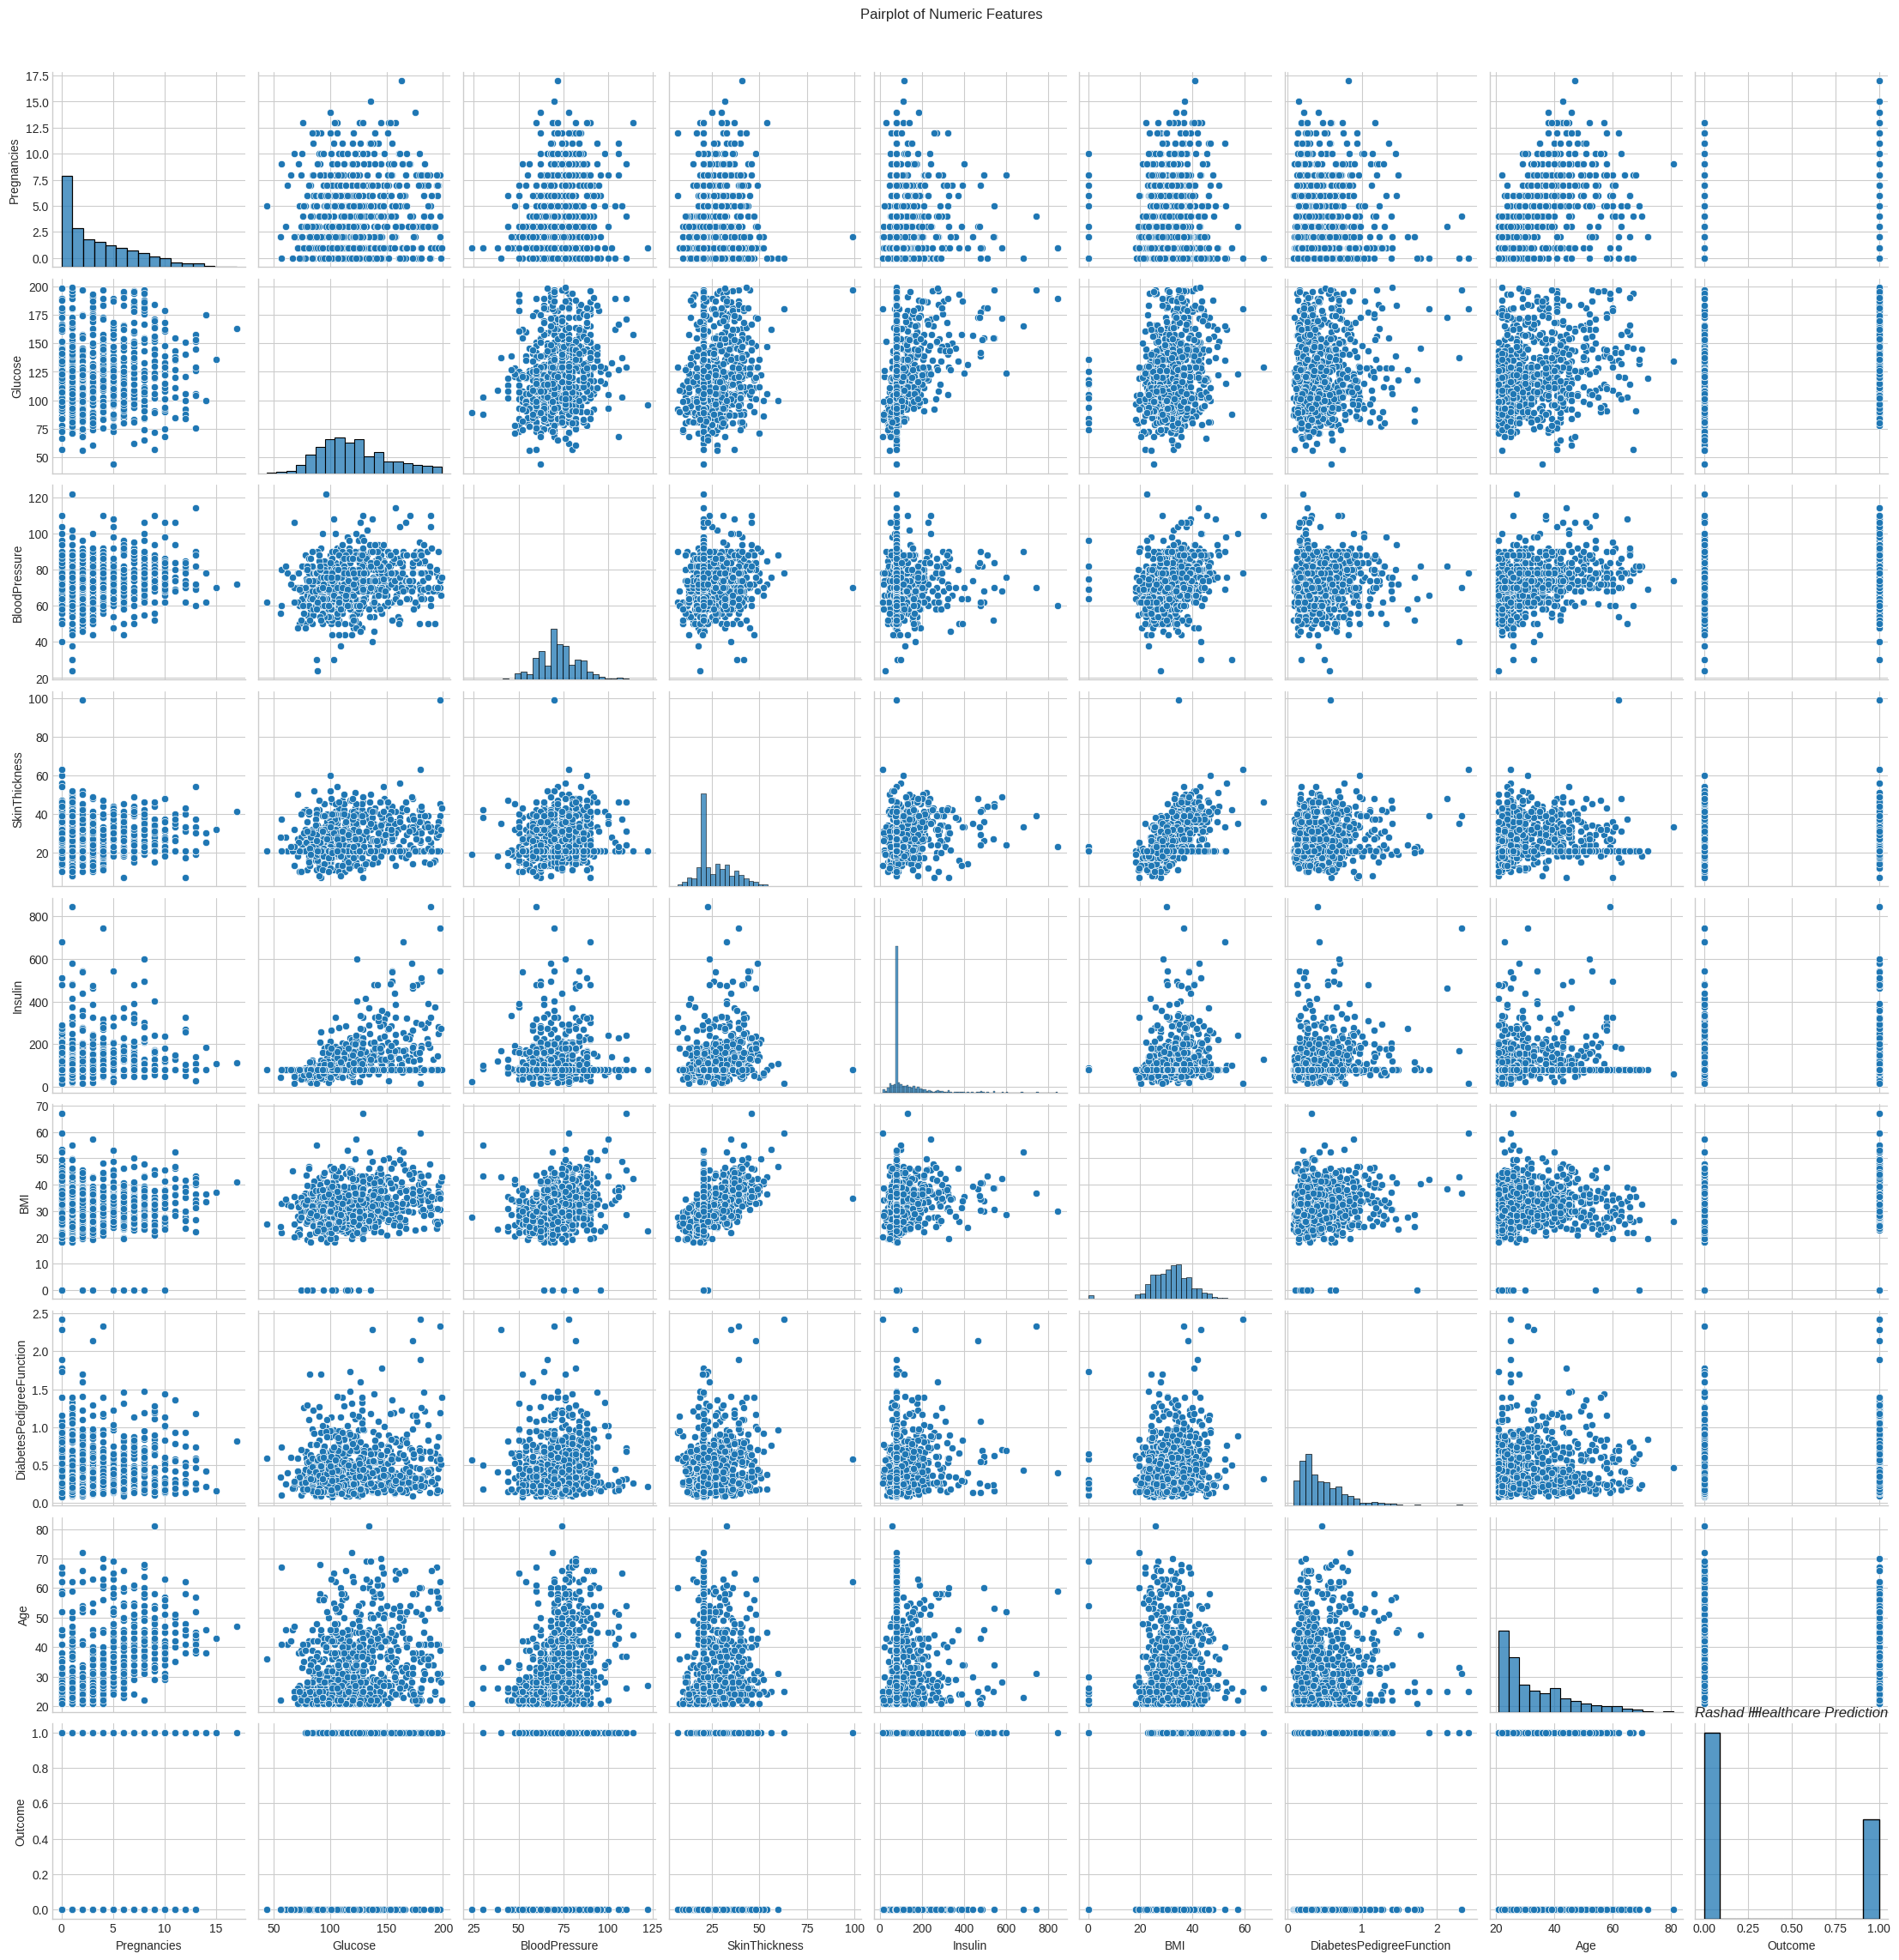

In [211]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

## Outliers are significantly reduced

In [212]:
# Using different graph style for below graphs
plt.style.use('seaborn-v0_8-whitegrid')

data_cleared_iqr.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

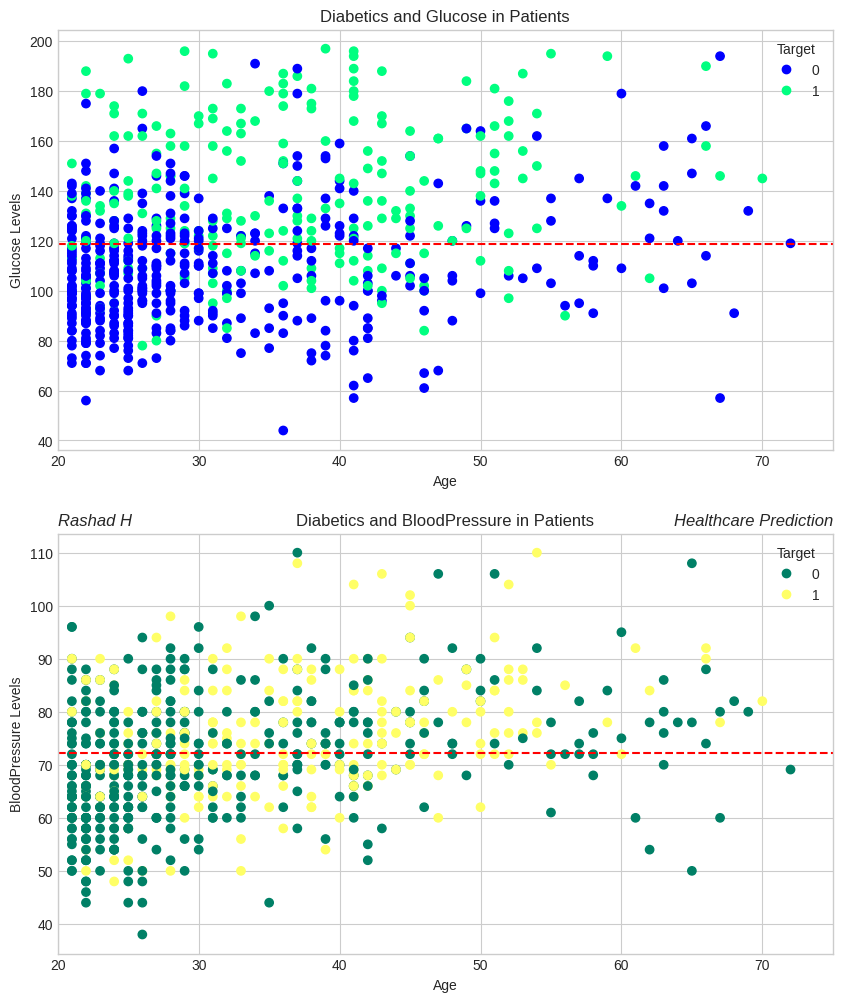

In [213]:
# Scatter Plots for Glucose, BloodPressure, Skin Thickness, Insulin
fig,(ax0,ax1)=plt.subplots(ncols=1, nrows=2,figsize=(10,12))

# Scatter plot on Diabetics and Glucose in Patients
scatter0=ax0.scatter(x=data_cleared_iqr['Age'],y=data_cleared_iqr['Glucose'],c=data_cleared_iqr['Outcome'],cmap='winter')
ax0.legend(*scatter0.legend_elements(),title='Target')
ax0.axhline(data_cleared_iqr['Glucose'].mean(),ls='--',c= 'red')
ax0.set(title='Diabetics and Glucose in Patients', xlabel='Age',ylabel='Glucose Levels')
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
ax0.set_xlim([20,75])

# Scatter plot on Diabetics and BloodPressure in Patients
scatter1=ax1.scatter(x=data_cleared_iqr['Age'],y=data_cleared_iqr['BloodPressure'],c=data_cleared_iqr['Outcome'],cmap='summer')
ax1.legend(*scatter1.legend_elements(),title='Target')
ax1.axhline(data_cleared_iqr['BloodPressure'].mean(),ls='--',c= 'red')
ax1.set(title='Diabetics and BloodPressure in Patients', xlabel='Age',ylabel='BloodPressure Levels')
ax1.set_xlim([20,75])
plt.show()

##### In the above graphs we can see that,
* In the first graph on Diabetics and Glucose in Patients, we can observe that most of people who has Glucose above 120 have Diabetics
* In the second graph on Diabetics and BloodPressure in Patients, we can observe that most of the people who has crossed 30 years and has BP above 70 have Diabetics

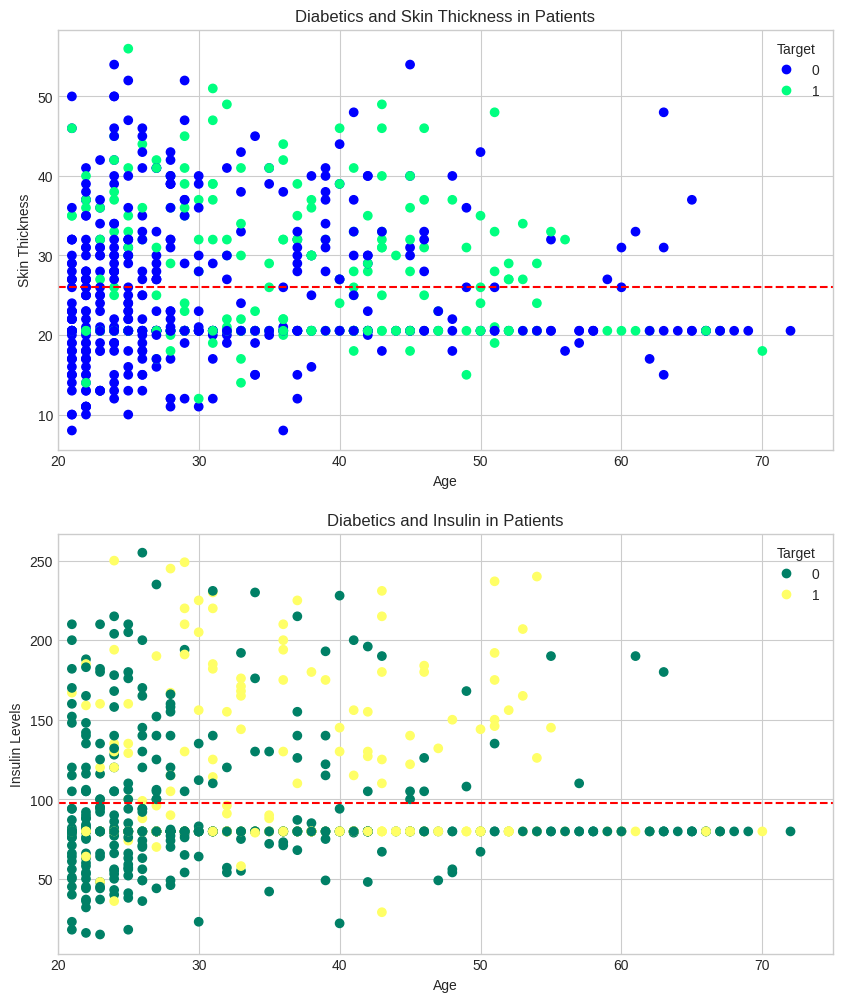

In [214]:
fig,(ax2,ax3)=plt.subplots(ncols=1, nrows=2,figsize=(10,12))

# Scatter plot on Diabetics and Skin Thickness in Patients
scatter2=ax2.scatter(x=data_cleared_iqr['Age'],y=data_cleared_iqr['SkinThickness'],c=data_cleared_iqr['Outcome'],cmap='winter')
ax2.legend(*scatter0.legend_elements(),title='Target')
ax2.axhline(data_cleared_iqr['SkinThickness'].mean(),ls='--',c= 'red')
ax2.set(title='Diabetics and Skin Thickness in Patients', xlabel='Age',ylabel='Skin Thickness')
ax2.set_xlim([20,75])

# Scatter plot on Diabetics and Insulin in Patients
scatter3=ax3.scatter(x=data_cleared_iqr['Age'],y=data_cleared_iqr['Insulin'],c=data_cleared_iqr['Outcome'],cmap='summer')
ax3.legend(*scatter3.legend_elements(),title='Target')
ax3.axhline(data_cleared_iqr['Insulin'].mean(),ls='--',c= 'red')
ax3.set(title='Diabetics and Insulin in Patients', xlabel='Age',ylabel='Insulin Levels')
ax3.set_xlim([20,75])

plt.show()

## EDA - Univariate analysis for each feature

### Visually exploring variables using histograms

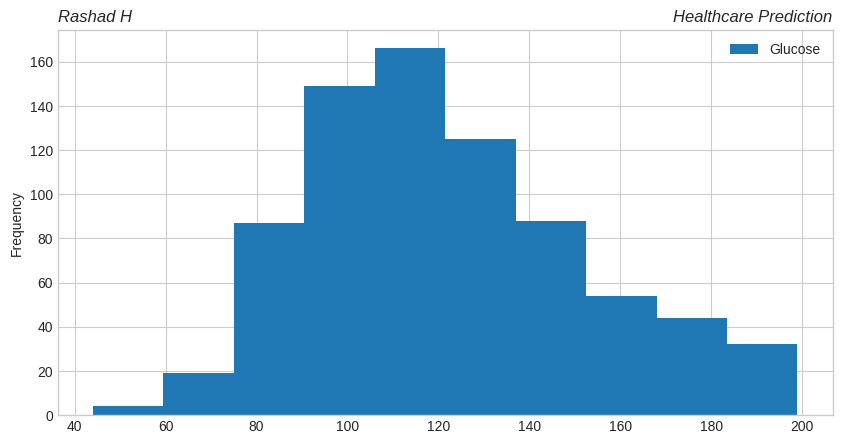

In [215]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.legend()
plt.show()

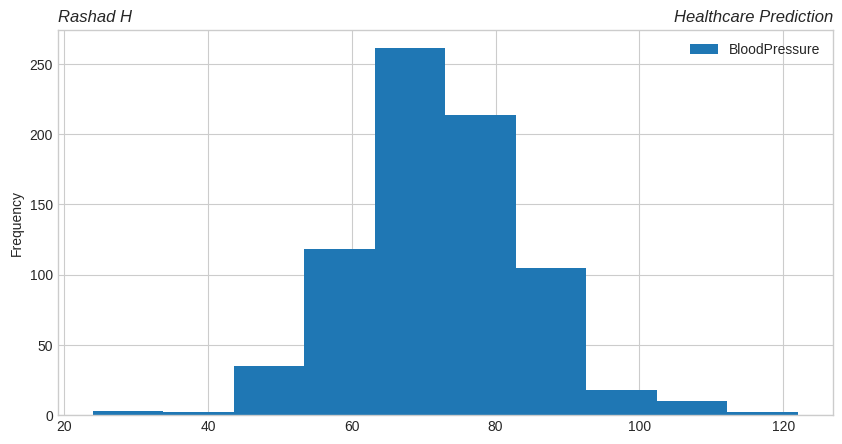

In [216]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.legend()
plt.show()

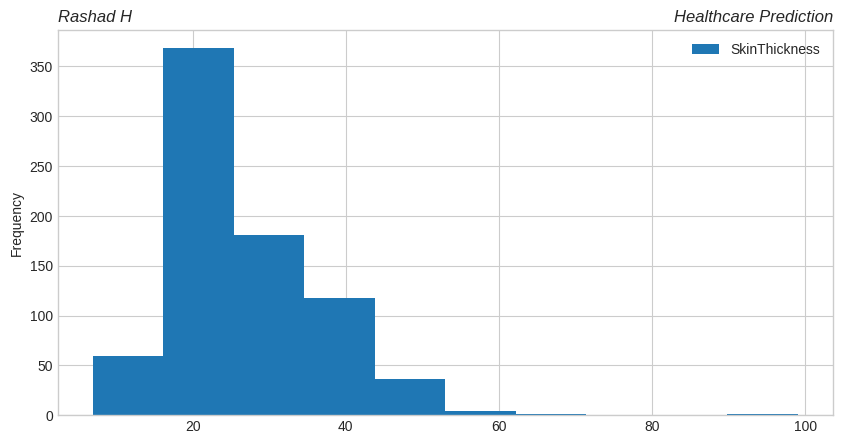

In [217]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5),)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.legend()
plt.show()

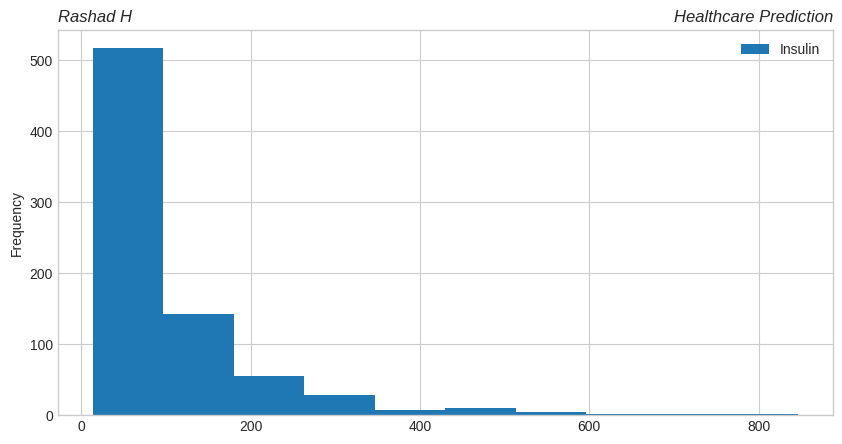

In [218]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.legend()
plt.show()

### Violin plot for the selected features

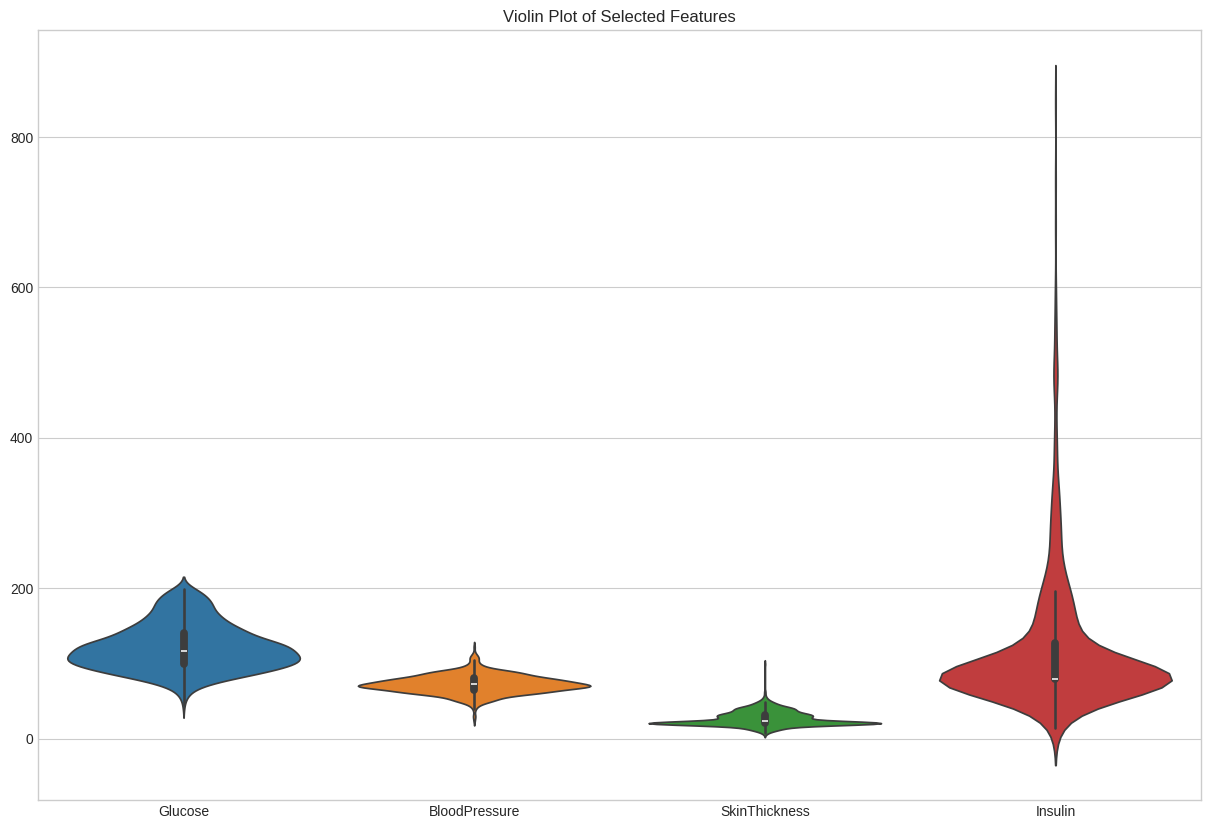

In [219]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()

#### The violin plot shows the distribution of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. The violin shape represents the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers.

###  Kernel Density Estimation (KDE) plot for the selected features

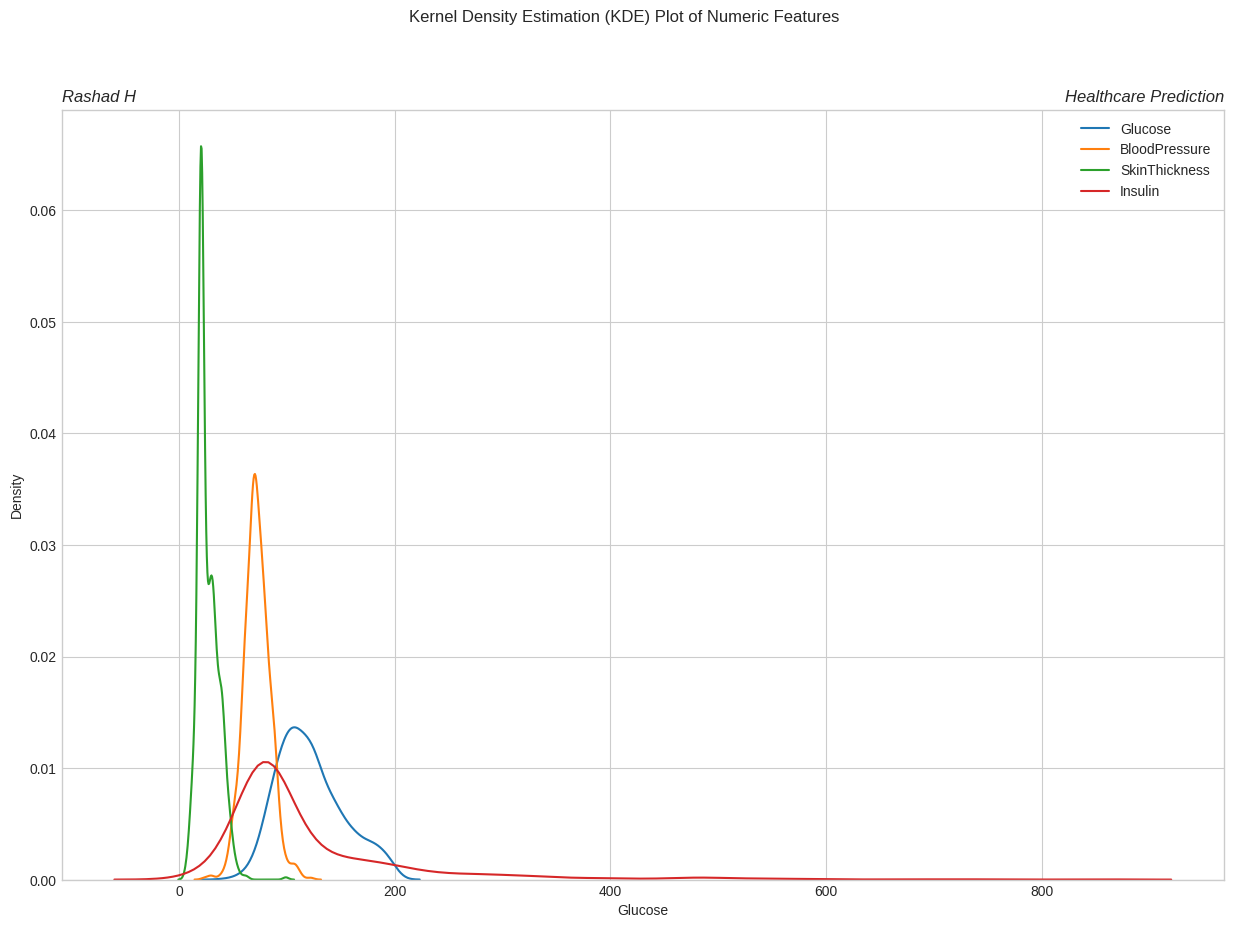

In [220]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label=column)
plt.suptitle("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.legend()
plt.show()

#### The image shows a Kernel Density Estimation (KDE) plot of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be used to visualize the distribution of the data.



###  Creating a count (frequency) plot describing the data types and the count of variables.

In [221]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [222]:
data.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

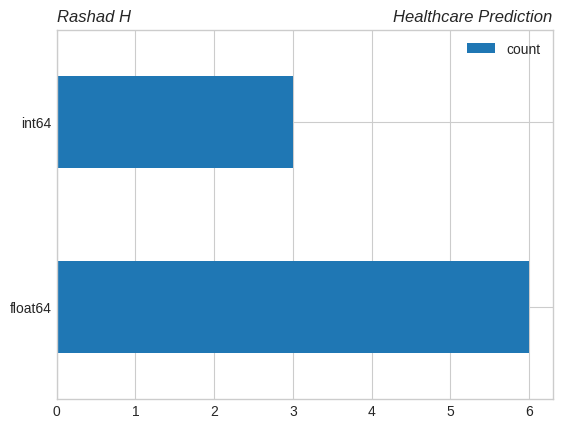

In [223]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

#### It can be Observed that there are three features of integer data type and six features of float data type

### Data Exploration:

### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [224]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

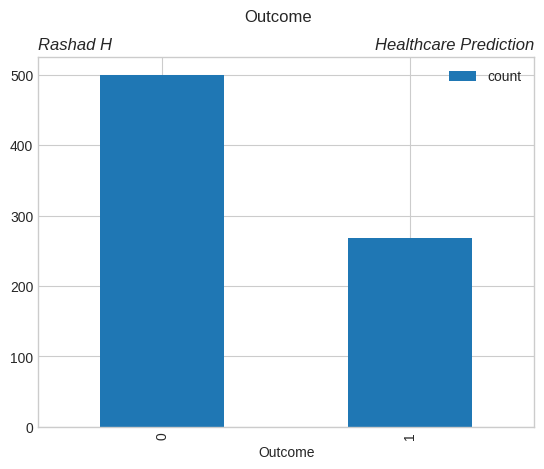

In [225]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.suptitle('Outcome')
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

In [226]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

### Inferences from Outcome Distribution

1. **Class Imbalance:**
   - The dataset exhibits class imbalance in the 'Outcome' variable.
   - Class 0 (No Diabetes) has 500 instances.
   - Class 1 (Diabetes) has 268 instances.

2. **Potential Impact on Modeling:**
   - Class imbalances may affect the performance of machine learning models, particularly for binary classification tasks.
   - Addressing class imbalance through techniques like resampling or using appropriate evaluation metrics may be necessary.

3. **Consideration for Predictive Models:**
   - Models may need to be evaluated and tuned considering the imbalanced distribution to avoid biased predictions toward the majority class.

In [227]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

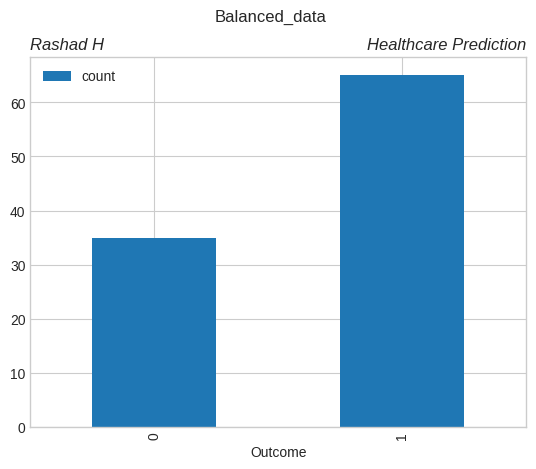

In [228]:
balanced_data.plot(kind='bar')
plt.legend()
plt.suptitle('Balanced_data')
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

###  Findings and plan future course of action.

 - We can see It's a Imbalance dataset,This shows that a dataset is biased towards a class(0) in the dataset. If the dataset is biased towards one class, an algorithm trained on the same data will be biased towards the same class,so first we have to balance it.
 - We can use Resampling or SMOTE to balance a dataset.

### Bi-Variate Analysis

###  Creating scatter charts between the pair of variables to understand the relationships.

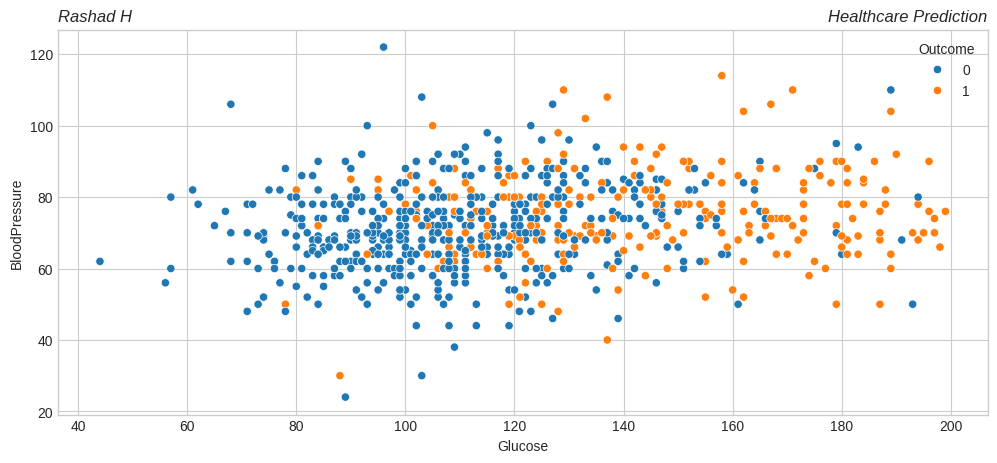

In [229]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

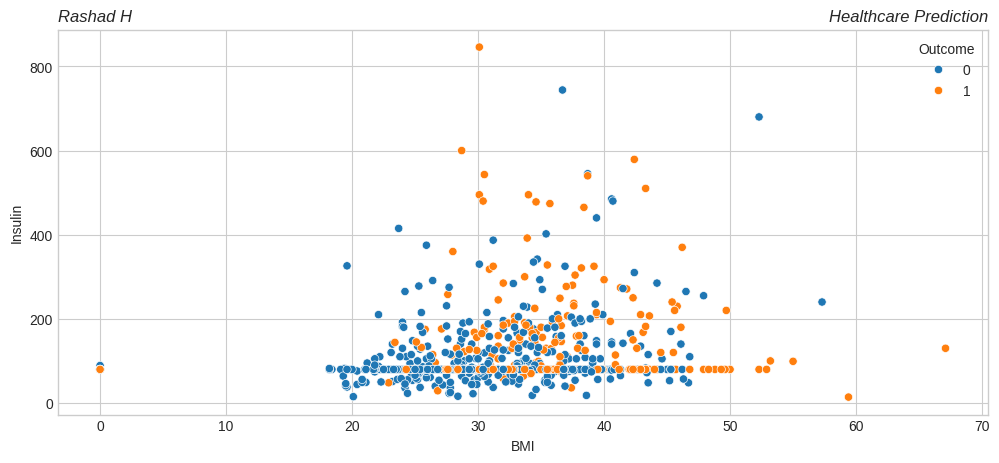

In [230]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

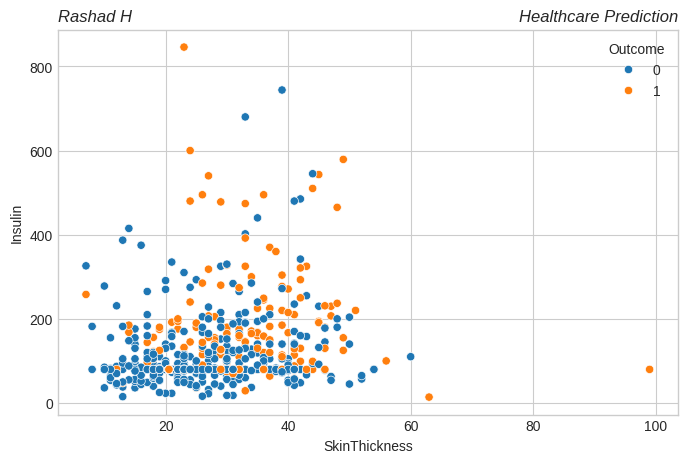

In [231]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

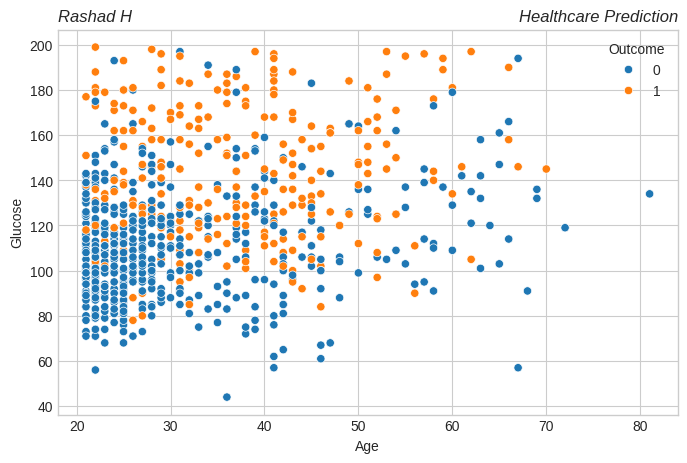

In [232]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

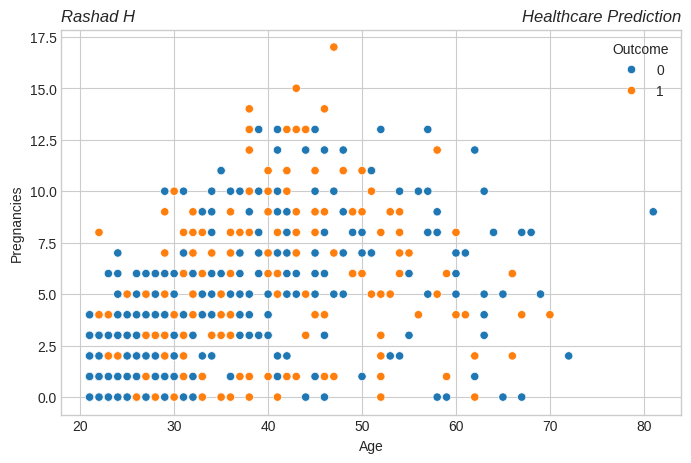

In [233]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Pregnancies', hue='Outcome',data=data)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

- We can see Pregnancies has highest relation with Age feature.
- Also, Outcome has maximum relation with Glucose and minimum with Blood Presure than the other features.

- We can see from scatter plot, that there is ouliers present in this data.
- Because of outliers, our data is skewed to left or right side, which is not acceptable.
- If we want to train a model, this poses a problem.
- Therefore, for better visualization and outlier detection, we can use sns.boxplot and remove outliers from the dataset.

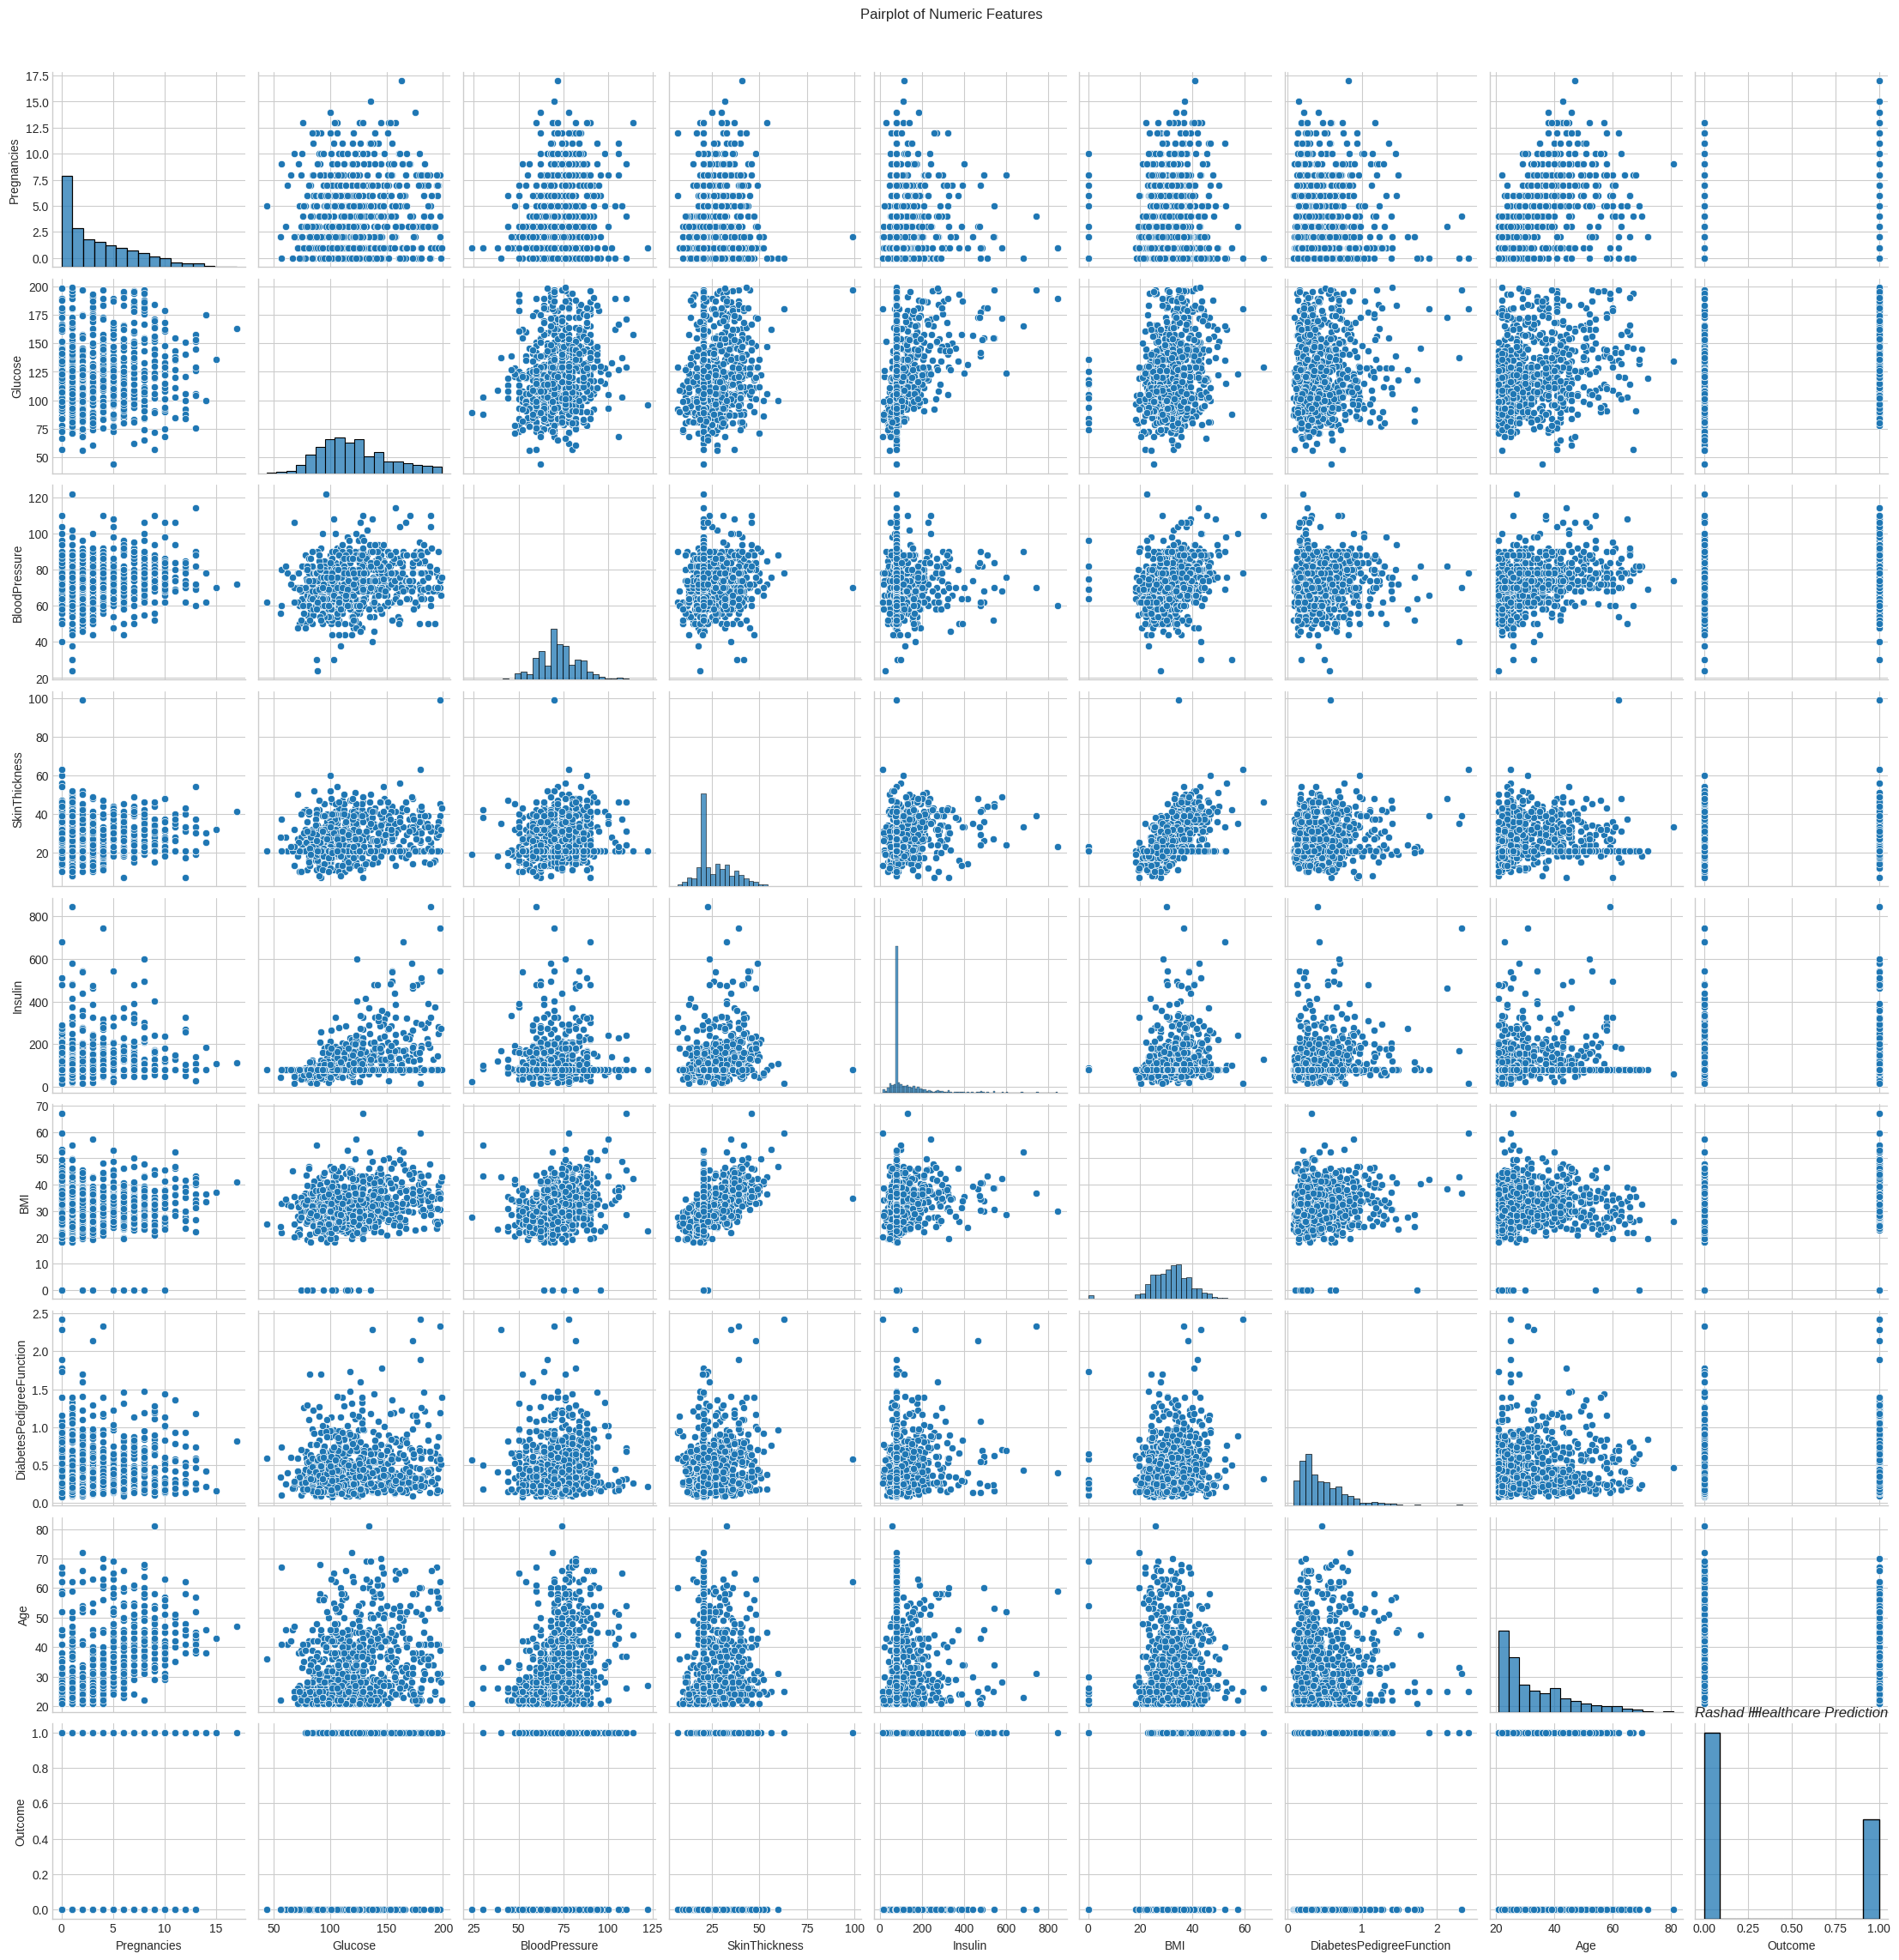

In [234]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

### Multi-Variate Analysis

### Perform correlation analysis. Visually explore it using a heat map.

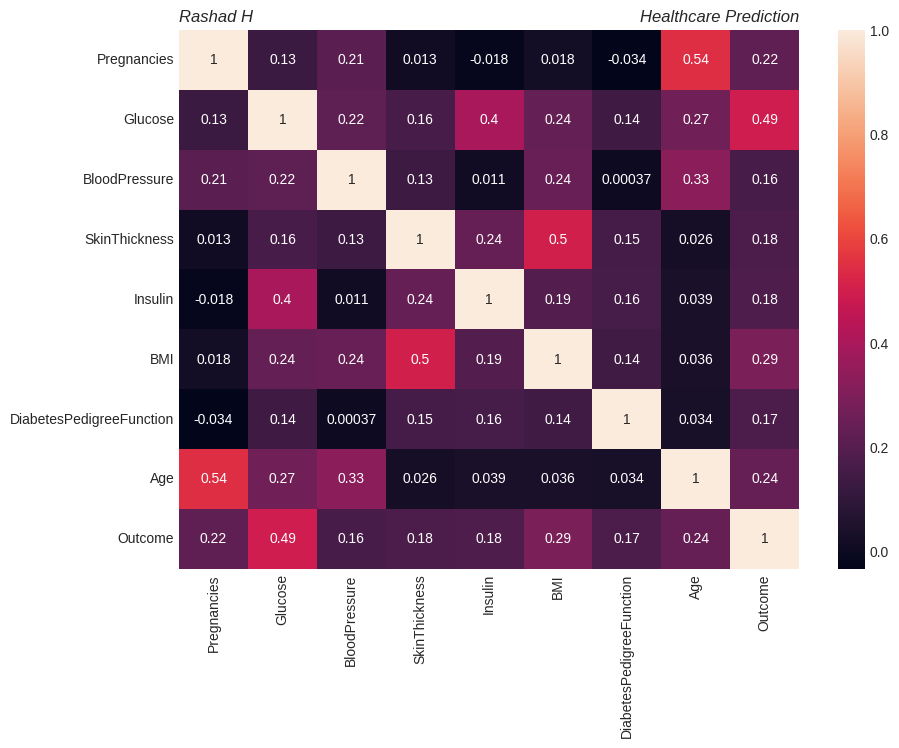

In [235]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.title("Rashad H", loc = "left", style = "italic"); plt.title("Healthcare Prediction", loc = "right", style = "italic")
plt.show()

#### We can see Outcome has maximum relation with Glucose and minimum with Blood Presure than the other features.